In [ ]:
from google.colab import files
uploaded=files.upload()

Saving healthcare-dataset-stroke-data.xlsx to healthcare-dataset-stroke-data.xlsx


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.metrics import accuracy_score,f1_score,classification_report,precision_score,recall_score,confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [ ]:
stroke=pd.read_excel('/content/healthcare-dataset-stroke-data.xlsx')

In [ ]:
stroke.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [ ]:
len(stroke)

5110

In [ ]:
for a in stroke.columns:
  print(a)

id
gender
age
hypertension
heart_disease
ever_married
work_type
Residence_type
avg_glucose_level
bmi
smoking_status
stroke


In [ ]:
stroke.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [ ]:
stroke.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
stroke['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [ ]:
stroke['smoking_status'].replace('Unknown',np.nan,inplace=True)

In [ ]:
stroke['smoking_status']

0       formerly smoked
1          never smoked
2          never smoked
3                smokes
4          never smoked
             ...       
5105       never smoked
5106       never smoked
5107       never smoked
5108    formerly smoked
5109                NaN
Name: smoking_status, Length: 5110, dtype: object

In [ ]:
stroke.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [ ]:
stroke.drop(['id'],axis=1,inplace=True)

In [ ]:
stroke.shape[1]

11

In [ ]:
stroke.isnull().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [ ]:
stroke.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [ ]:
stroke['gender'].value_counts()

Female    2995
Male      2115
Name: gender, dtype: int64

#Visualisation

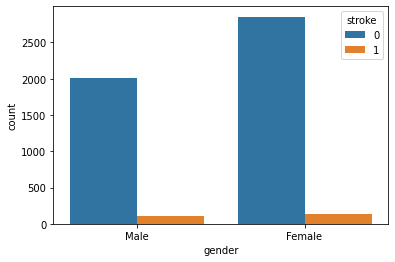

In [ ]:
# sns.countplot(data=stroke,x='gender')
sns.countplot(data=stroke,x='gender',hue='stroke')

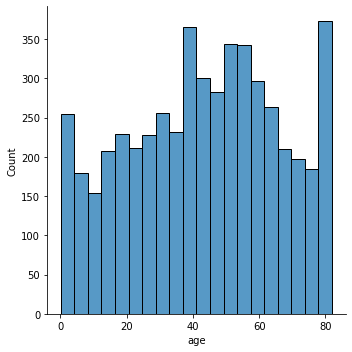

In [ ]:
sns.displot(stroke['age'])

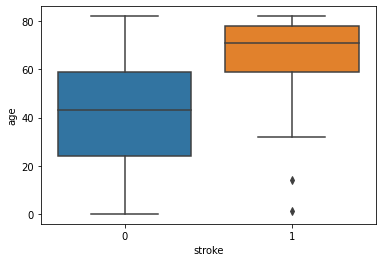

In [ ]:
sns.boxplot(data=stroke,x='stroke',y='age')

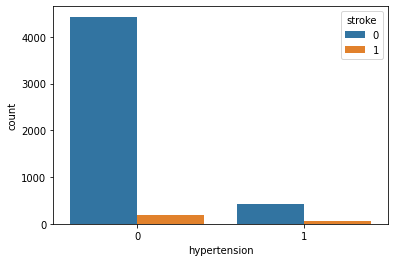

In [ ]:
sns.countplot(data=stroke,x='hypertension',hue='stroke')

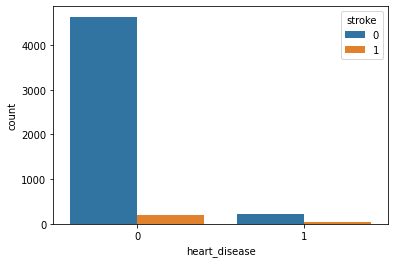

In [ ]:
sns.countplot(data=stroke,x='heart_disease',hue='stroke')

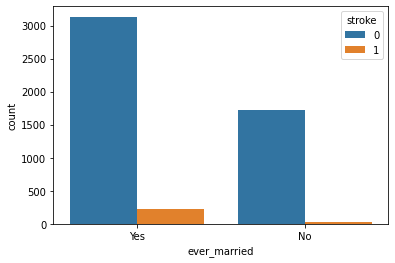

In [ ]:
sns.countplot(data=stroke,x='ever_married',hue='stroke')

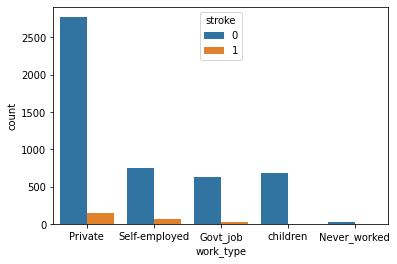

In [ ]:
sns.countplot(data=stroke,x='work_type',hue='stroke')

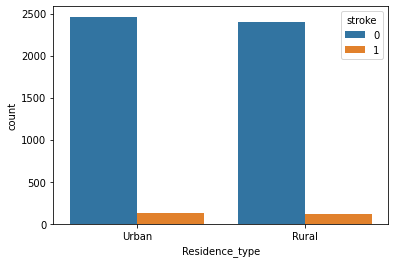

In [ ]:
sns.countplot(data=stroke,x='Residence_type',hue='stroke')

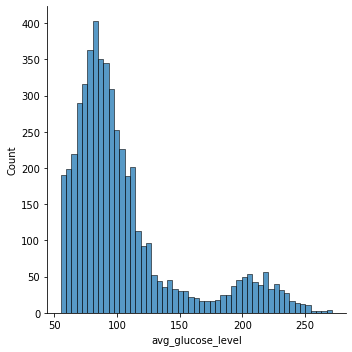

In [ ]:
sns.displot(stroke['avg_glucose_level'])

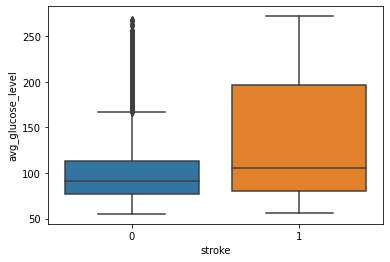

In [ ]:
sns.boxplot(data=stroke,x='stroke',y='avg_glucose_level')

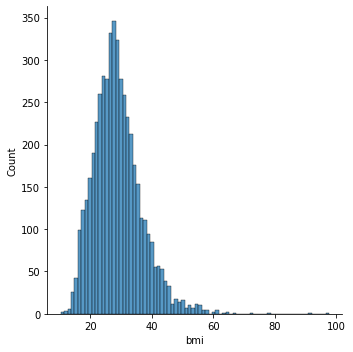

In [ ]:
sns.displot(stroke['bmi'])

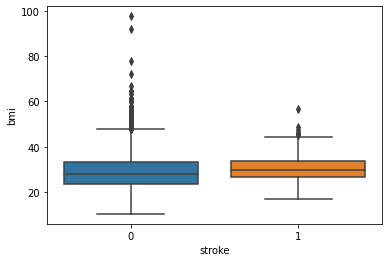

In [ ]:
sns.boxplot(data=stroke,x='stroke',y='bmi')

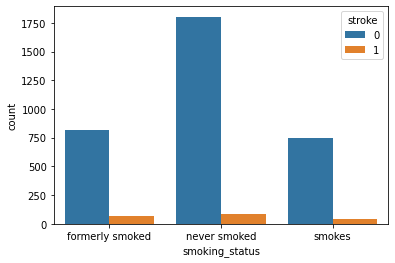

In [ ]:
sns.countplot(data=stroke,x='smoking_status',hue='stroke')

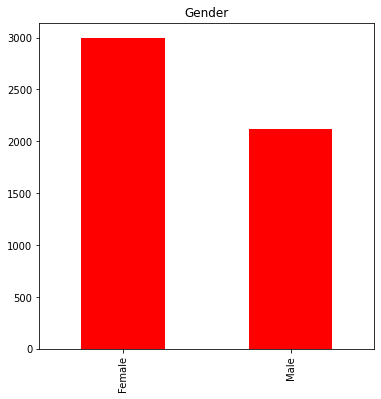

In [ ]:
fig=plt.figure(figsize=(6,6))
# plt.bar(stroke['gender'],range(5110))
plt.title('Gender')
stroke['gender'].value_counts().plot.bar(color='red')

<BarContainer object of 2 artists>

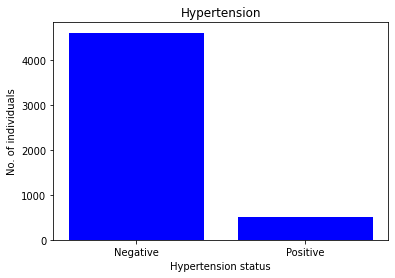

In [ ]:
plt.title('Hypertension')
heightertension=[stroke['hypertension'].value_counts()[0],stroke['hypertension'].value_counts()[1]]
bhottension=['Negative','Positive']
plt.xlabel('Hypertension status')
plt.ylabel("No. of individuals")
plt.bar(bhottension,heightertension,color='blue')

<BarContainer object of 2 artists>

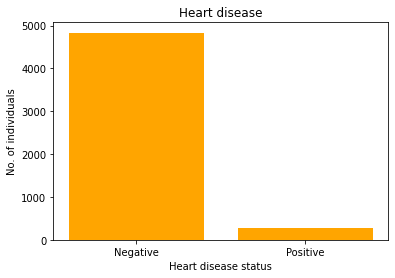

In [ ]:
plt.title('Heart disease')
heightertension=[stroke['heart_disease'].value_counts()[0],stroke['heart_disease'].value_counts()[1]]
bhottension=['Negative','Positive']
plt.xlabel('Heart disease status')
plt.ylabel("No. of individuals")
plt.bar(bhottension,heightertension,color='orange')

<BarContainer object of 2 artists>

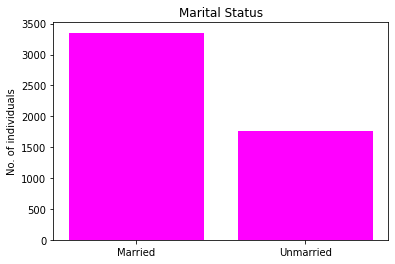

In [ ]:
plt.title('Marital Status')
heightertension=[stroke['ever_married'].value_counts()[0],stroke['ever_married'].value_counts()[1]]
bhottension=['Married','Unmarried']
plt.ylabel("No. of individuals")
plt.bar(bhottension,heightertension,color='magenta')

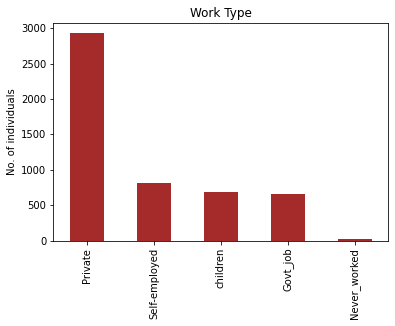

In [ ]:
plt.title('Work Type')
plt.ylabel("No. of individuals")
stroke['work_type'].value_counts().plot.bar(color='brown')

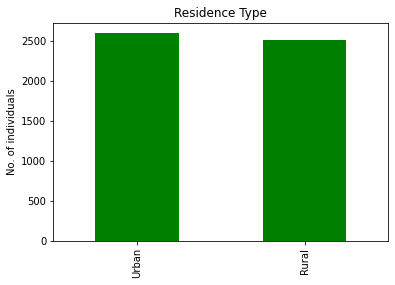

In [ ]:
plt.title('Residence Type')
plt.ylabel("No. of individuals")
stroke['Residence_type'].value_counts().plot.bar(color='green')

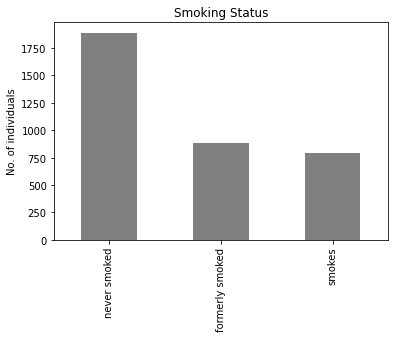

In [ ]:
plt.title('Smoking Status')
plt.ylabel("No. of individuals")
stroke['smoking_status'].value_counts().plot.bar(color='grey')

<BarContainer object of 2 artists>

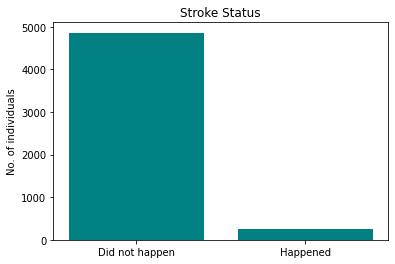

In [ ]:
plt.title('Stroke Status')
plt.ylabel("No. of individuals")
heightertension=[stroke['stroke'].value_counts()[0],stroke['stroke'].value_counts()[1]]
bhottension=['Did not happen','Happened']
plt.bar(bhottension,heightertension,color='teal')

Text(0.5, 1.0, 'Age distribution')

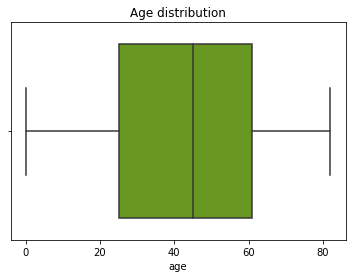

In [ ]:
sns.boxplot(x='age',data=stroke,color='#6bab0c')
plt.title('Age distribution')

Text(0.5, 1.0, 'Average Glucose level distribution')

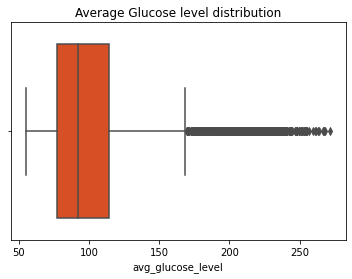

In [ ]:
sns.boxplot(x='avg_glucose_level',data=stroke,color='#f53f07')
plt.title('Average Glucose level distribution')

Text(0.5, 1.0, 'BMI distribution')

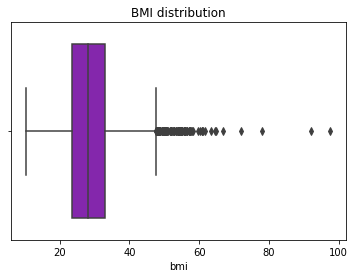

In [ ]:
sns.boxplot(x='bmi',data=stroke,color='#8d11c2')
plt.title('BMI distribution')

#Predicting values

##Encoding

In [ ]:
cols=stroke.select_dtypes(include=['object']).columns
ohe=LabelEncoder()
stroke[cols]=stroke[cols].apply(ohe.fit_transform)
stroke.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,0,1
1,0,61.0,0,0,1,3,0,202.21,NaN,1,1
2,1,80.0,0,1,1,2,0,105.92,32.5,1,1
3,0,49.0,0,0,1,2,1,171.23,34.4,2,1
4,0,79.0,1,0,1,3,0,174.12,24.0,1,1


##Correlation heatmap

<Axes: >

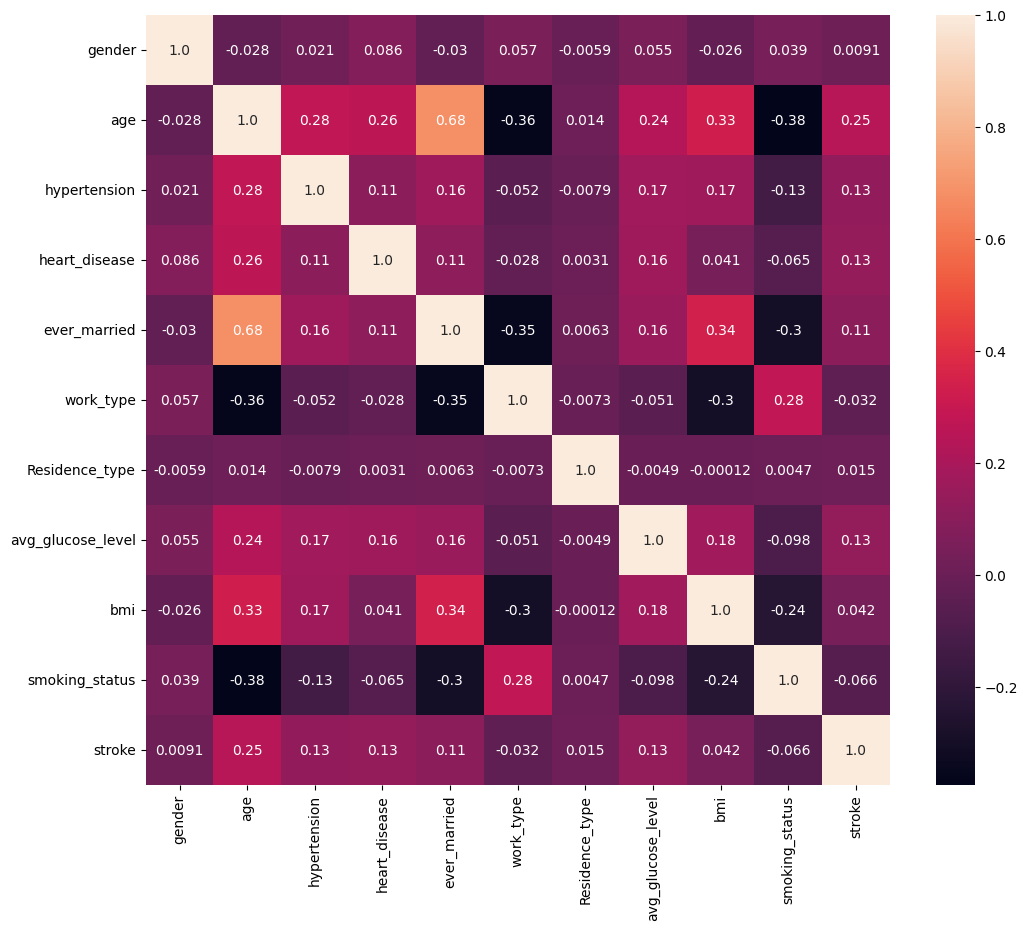

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(stroke.corr(),annot=True,fmt='.2')

##Handling null values

In [ ]:
stroke['bmi'].fillna(stroke.bmi.median(),inplace=True)

In [ ]:
stroke['smoking_status'].fillna(stroke['smoking_status'].mode()[0],inplace=True)

In [ ]:
stroke.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

##Filtering attributes which affects stroke most

In [ ]:
skb=SelectKBest(score_func=f_classif,k=5)
fits=skb.fit(stroke.drop('stroke',axis=1),stroke['stroke'])
scpd=pd.DataFrame(fits.scores_)
col=pd.DataFrame(stroke.drop('stroke',axis=1).columns)
fsc=pd.concat([col,scpd],axis=1)
fsc.columns=['Attribute','Score']
fsc.sort_values(by='Score',ascending=False)

,Attribute,Score
1,age,326.916568
3,heart_disease,94.698406
7,avg_glucose_level,90.503870
2,hypertension,84.953542
4,ever_married,60.667230
9,smoking_status,22.615737
8,bmi,6.669168
5,work_type,5.340019
6,Residence_type,1.220842
0,gender,0.424625


In [ ]:
colus=fsc[fsc['Score']>50].Attribute
colus

1                  age
2         hypertension
3        heart_disease
4         ever_married
7    avg_glucose_level
Name: Attribute, dtype: object

##Splitting dataset

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(stroke[colus],
                                               stroke['stroke'],
                                               random_state=1266,
                                               test_size=0.25)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((3832, 5), (1278, 5), (3832,), (1278,))

##Sampling dataset

In [ ]:
smote=SMOTE()
train_x,train_y=smote.fit_resample(train_x,train_y)
test_x,test_y=smote.fit_resample(test_x,test_y)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((7296, 5), (2426, 5), (7296,), (2426,))

## RandomForest Classifier

In [ ]:
rnf=RandomForestClassifier(random_state=50,n_jobs=-1)
rnf.fit(train_x,train_y)
renf_pred=rnf.predict(test_x)
accuracy_score(renf_pred,test_y)

0.7032151690024732

In [ ]:
cf_rnf=confusion_matrix(test_y,renf_pred)

<Axes: >

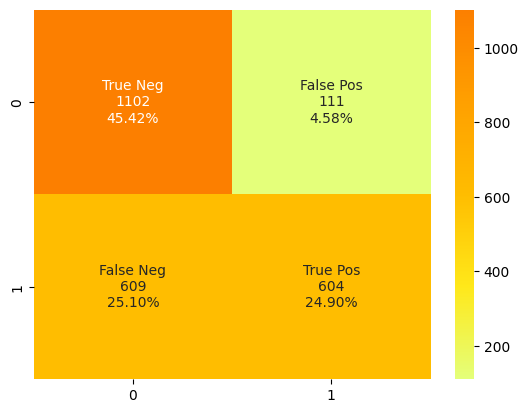

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_rnf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_rnf.flatten()/np.sum(cf_rnf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_rnf, annot=labels, fmt='', cmap='Wistia')

In [ ]:
print('Precision: ',precision_score(test_y,renf_pred))
print('Recall score: ',recall_score(test_y,renf_pred))
print('F1 score: ',f1_score(test_y,renf_pred))

Precision:  0.8447552447552448
Recall score:  0.49793899422918386
F1 score:  0.6265560165975105


##Naive-Bayes Classifier

In [ ]:
gnb=GaussianNB()
gnb.fit(train_x,train_y)
pred=gnb.predict(test_x)
accuracy_score(pred,test_y)

0.7769991755976917

In [ ]:
cf_nb=confusion_matrix(test_y,pred)

<Axes: >

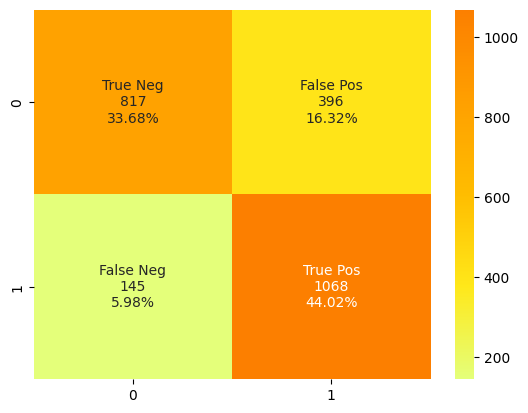

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_nb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_nb.flatten()/np.sum(cf_nb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_nb, annot=labels, fmt='', cmap='Wistia')

In [ ]:
precision_score(test_y,pred)

0.7313738892686261

In [ ]:
recall_score(test_y,pred)

0.8821104699093157

In [ ]:
f1_score(test_y,pred)

0.7997010463378178

##K-NN Classifier

In [ ]:
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(train_x,train_y)
predi=knn.predict(test_x)
accuracy_score(predi,test_y)

0.686727122835944

In [ ]:
cf_knn=confusion_matrix(test_y,predi)

<Axes: >

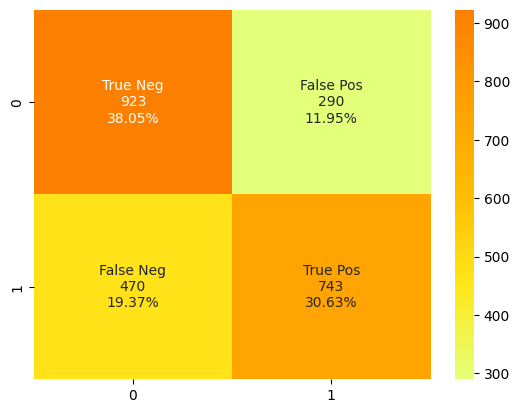

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_knn.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_knn.flatten()/np.sum(cf_knn)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_knn, annot=labels, fmt='', cmap='Wistia')

In [ ]:
precision_score(test_y,predi)

0.7240896358543417

In [ ]:
recall_score(test_y,predi)

0.42621599340478156

In [ ]:
f1_score(test_y,predi)

0.5365853658536585

##Decision Tree Classifier

In [ ]:
dtr=DecisionTreeClassifier()
dtr.fit(train_x,train_y)
ohyeah=dtr.predict(test_x)
accuracy_score(ohyeah,test_y)

0.6780708985985161

In [ ]:
cf_dtr=confusion_matrix(test_y,ohyeah)

<Axes: >

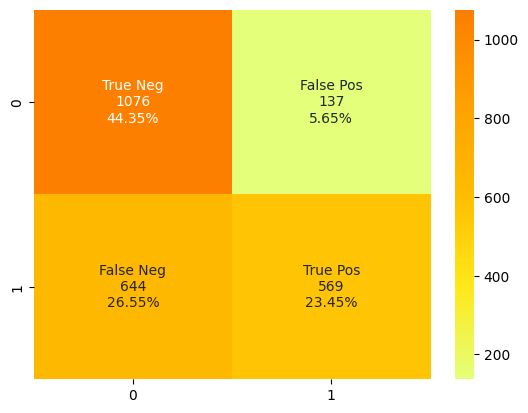

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_dtr.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_dtr.flatten()/np.sum(cf_dtr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_dtr, annot=labels, fmt='', cmap='Wistia')

In [ ]:
precision_score(test_y,ohyeah)

0.8059490084985835

In [ ]:
recall_score(test_y,ohyeah)

0.4690849134377576

In [ ]:
f1_score(test_y,ohyeah)

0.5930171964564878

## SVM

In [ ]:
svm=SVC()
svm.fit(train_x,train_y)
svm_pred=svm.predict(test_x)
accuracy_score(svm_pred,test_y)

0.7724649629018961

In [ ]:
cf_svm=confusion_matrix(test_y,svm_pred)

<Axes: >

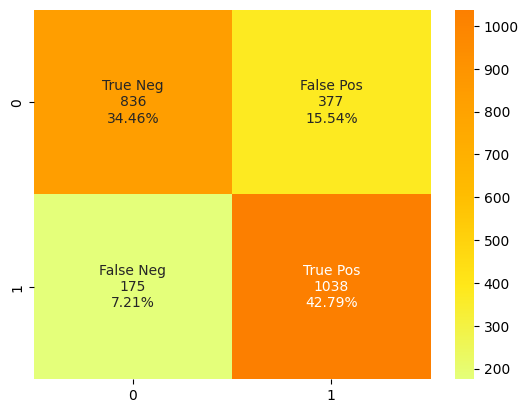

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_svm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_svm.flatten()/np.sum(cf_svm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_svm, annot=labels, fmt='', cmap='Wistia')

In [ ]:
print('Precision: ',precision_score(test_y,svm_pred))
print('Recall score: ',recall_score(test_y,svm_pred))
print('F1 score: ',f1_score(test_y,svm_pred))

Precision:  0.7335689045936395
Recall score:  0.8557295960428689
F1 score:  0.7899543378995433


## Logistic Regression

In [ ]:
logr=LogisticRegression(random_state=50)
logr.fit(train_x,train_y)
logr_pred=logr.predict(test_x)
accuracy_score(logr_pred,test_y)

0.7823577906018137

In [ ]:
cf_logr=confusion_matrix(test_y,logr_pred)

<Axes: >

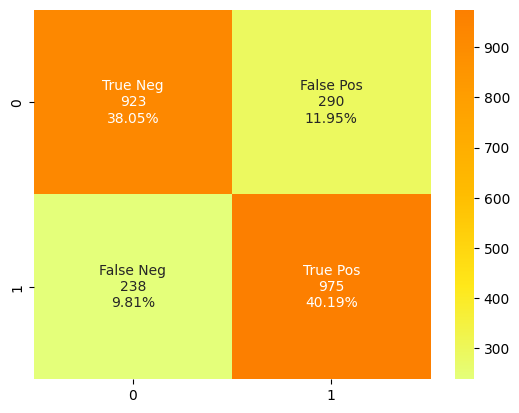

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_logr.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_logr.flatten()/np.sum(cf_logr)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_logr, annot=labels, fmt='', cmap='Wistia')

In [ ]:
print('Precision: ',precision_score(test_y,logr_pred))
print('Recall score: ',recall_score(test_y,logr_pred))
print('F1 score: ',f1_score(test_y,logr_pred))

Precision:  0.7707509881422925
Recall score:  0.8037922506183017
F1 score:  0.7869249394673123


## XGBoost

In [ ]:
xgb=XGBClassifier()
xgb.fit(train_x,train_y)
xgb_pred=xgb.predict(test_x)
accuracy_score(xgb_pred,test_y)

0.9018961253091509

In [ ]:
cf_xgb=confusion_matrix(test_y,xgb_pred)

<Axes: >

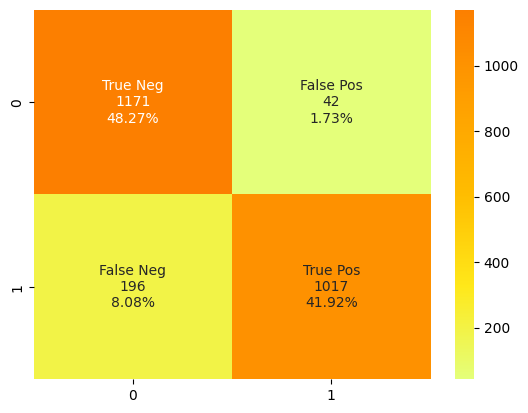

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_xgb.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_xgb.flatten()/np.sum(cf_xgb)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_xgb, annot=labels, fmt='', cmap='Wistia')

In [ ]:
print('Precision: ',precision_score(test_y,xgb_pred))
print('Recall score: ',recall_score(test_y,xgb_pred))
print('F1 score: ',f1_score(test_y,xgb_pred))

Precision:  0.9603399433427762
Recall score:  0.8384171475680132
F1 score:  0.8952464788732395


## AdaBoost Classifier

In [ ]:
ada=AdaBoostClassifier()
ada.fit(train_x,train_y)
ada_pred=ada.predict(test_x)
accuracy_score(ada_pred,test_y)

0.8009068425391591

In [ ]:
cf_ada=confusion_matrix(test_y,ada_pred)

<Axes: >

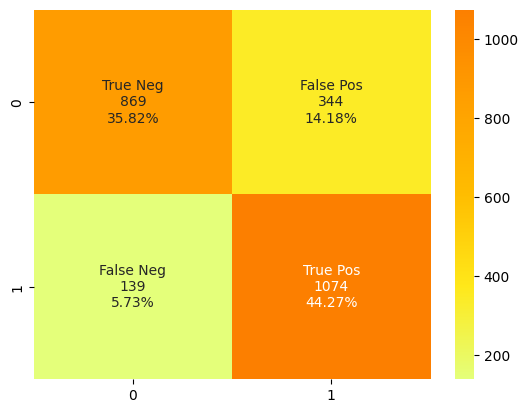

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_ada.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_ada.flatten()/np.sum(cf_ada)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_ada, annot=labels, fmt='', cmap='Wistia')

In [ ]:
print('Precision: ',precision_score(test_y,ada_pred))
print('Recall score: ',recall_score(test_y,ada_pred))
print('F1 score: ',f1_score(test_y,ada_pred))

Precision:  0.7574047954866009
Recall score:  0.8854080791426217
F1 score:  0.8164196123147093
